# Frequencies of relatively large biases for both sWBGT and ESI

- This notebook aims to quantify biases of sWBGT and ESI by comparing against Liljegren et al. (2008)'s explicit formulation of WBGT. 


- In Figure 2, bias was quantifed at climatological mean level. However, bias magnitudes can be much larger over certain individual days and/or hours. Here we count the frequencies of relatively large positive and negative biases based on original hourly time series during 1990-2019.


- In this notebook, we will reproduce Figure 3 in "Explicit Calculations of Wet Bulb Globe Temperature compared with approximations and why it matters for labor productivity" by Qinqin Kong and Matthew Huber. 

In [1]:
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import regionmask
import cartopy.crs as ccrs

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"
import warnings
warnings.filterwarnings("ignore")

### Read in data

In [3]:
# read in frequency of relatively large biases
bias_freq=xr.open_dataset('/scratch/brown/kong97/paper_data/earthfuture_kong_huber_2021/large_bias_freq.nc')

### Reproduce Figure 3

In [5]:
# create land mask
mask = regionmask.defined_regions.natural_earth.land_110.mask(bias_freq,lon_name="longitude",lat_name="latitude")
# function to plot each individual subplot
def subplot(data,fig,k,norm,cmap,landmask,ext,num):
    axis = fig.add_subplot(2, 2, k, projection=ccrs.Robinson(central_longitude=10))
    anno_opts = dict(xy=(0, 1.05), xycoords='axes fraction',va='center', ha='center')
    axis.annotate(num, **anno_opts,fontsize=16)
    
    anno_opts = dict(xy=(-0.1, 0.5), xycoords='axes fraction',va='center', ha='center')
    if k==1:
        axis.annotate('sWBGT', **anno_opts,fontsize=16,rotation=90)
    elif k==3:
        axis.annotate('ESI', **anno_opts,fontsize=16,rotation=90)
    
    anno_opts = dict(xy=(0.5, 1.1), xycoords='axes fraction',va='center', ha='center')
    if k==1:
        axis.annotate('>2$^\circ$C', **anno_opts,fontsize=16)
    elif k==2:
        axis.annotate('<-2$^\circ$C', **anno_opts,fontsize=16)    
    
    g=data.where(landmask==0).plot(ax=axis,transform=ccrs.PlateCarree(),
                                   cmap=cmap,norm=norm,add_colorbar=False,rasterized=True) # make the plot
    axis.coastlines(linewidth=0.5) # add coastlines
    axis.set_title('')
    axis.set_extent([-169.999,189.999,-60,70]) # set extent of the map to exclude high latitudes
    f=plt.gcf()
    if ext:
        cb=f.colorbar(g,ax=axis,orientation='horizontal', pad=0.05,shrink=0.5)
    else:
        cb=f.colorbar(g,ax=axis,orientation='horizontal', pad=0.05,shrink=0.5,extend='neither')
    cb.set_label(label="Percentage (%)", size=14)
    cb.ax.tick_params(labelsize=12)
    return g

# function to make the whole plot    
def plot(bias_freq):
    # create the figure
    fig = plt.figure(figsize=[12, 7])
    
    # set the colorbar scale
    levels1=[0,10,20,30,40,50,60,70,80,90,100]
    norm1=mpl.colors.BoundaryNorm(levels1,ncolors=len(levels1)-1,extend='neither')
    
    levels2=[0,0.2,0.4,0.6,0.8,1]
    norm2=mpl.colors.BoundaryNorm(levels2,ncolors=len(levels2),extend='max')
    
    levels3=[0,1,2,3,4,5]
    norm3=mpl.colors.BoundaryNorm(levels3,ncolors=len(levels3),extend='max')
    
    levels4=[0,3,6,9,12,15]
    norm4=mpl.colors.BoundaryNorm(levels4,ncolors=len(levels4),extend='max')
    # define colormap
    color=np.array([[255,255,255],
              [255,247,251],
              [224,243,248],
              [171,217,233],
              [116,173,209],
              [69,117,180],
              [255,255,191],
              [254,224,144],
              [253,174,97],
              [244,109,67]])
    cmap1=mpl.colors.ListedColormap(color/255.)
    
    color=np.array([[255,255,255],
                [224,243,248],
                [116,173,209],
                [255,255,191],
                [253,174,97],
                [244,109,67]])
    cmap2=mpl.colors.ListedColormap(color/255.)
    
    nums=['a','b','c','d']
    Vars=['swbgt_positive_bias_frequency_2C','swbgt_negative_bias_frequency_2C',
         'esi_positive_bias_frequency_2C','esi_negative_bias_frequency_2C']
    norms=[norm1,norm2,norm3,norm4]
    colormaps=[cmap1,cmap2,cmap2,cmap2]
    Vars=['swbgt_positive_bias_frequency_2C','swbgt_negative_bias_frequency_2C',
         'esi_positive_bias_frequency_2C','esi_negative_bias_frequency_2C']
    # call subplot function
    for k in np.arange(1,5):
        subplot(bias_freq[Vars[k-1]],fig,k,norms[k-1],colormaps[k-1],mask,False,nums[k-1])
    
    # adjust the relative position of subplots
    fig.subplots_adjust(bottom=0, left=0,right=1, top=1,hspace=-0.1,wspace=0.1)

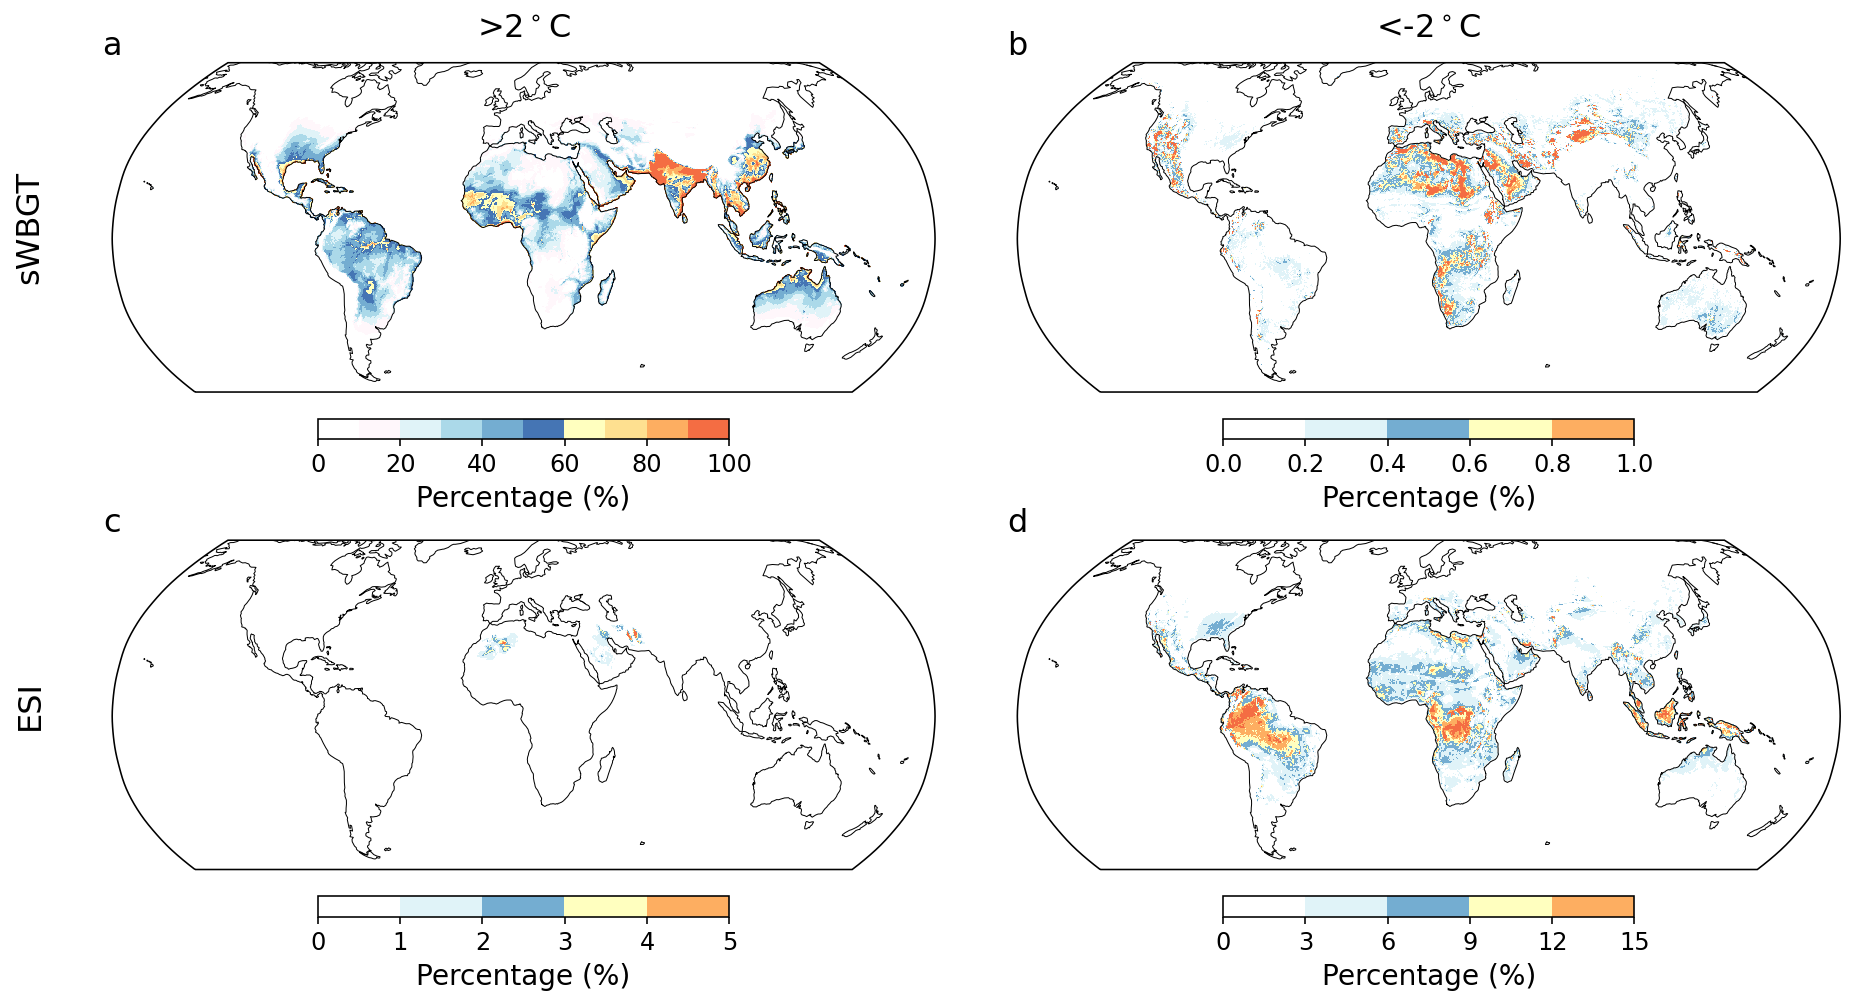

In [6]:
plot(bias_freq*100)

# Figure caption
Occurrence percentage of (a, c) positive and (b, d) negative biases larger than $\pm$2$^\circ$C for (a, b) sWBGT and (c, d) ESI during 1990-2019 with an additional requirement of WBGT exceeding 25$^\circ$C. Only the hottest month (defined by CMA WBGT) is included.